In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pathlib as Path
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.taggers import NLTKTagger

In [2]:
df = pd.read_csv("../data/raw_analyst_ratings/raw_analyst_ratings.csv", parse_dates=["date"])

# df.set_index('date', inplace=True)
df = df[['date','headline', "url", "publisher", "stock"]]
df.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [3]:
stock_count = df['stock'].value_counts()

print(stock_count)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


In [4]:
print("Description of the data: ")
# df.describe()
print("information of the data(data types)")
df.info()

Description of the data: 
information of the data(data types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1407328 non-null  object
 1   headline   1407328 non-null  object
 2   url        1407328 non-null  object
 3   publisher  1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [5]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))
print(df['headline_length'].describe())


count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


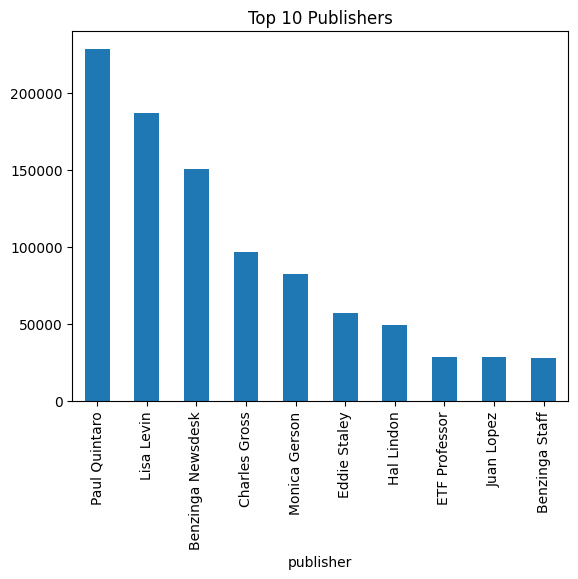

In [6]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))
publisher_counts.head(10).plot(kind='bar', title="Top 10 Publishers")
plt.show()


In [7]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             1407328 non-null  object
 1   headline         1407328 non-null  object
 2   url              1407328 non-null  object
 3   publisher        1407328 non-null  object
 4   stock            1407328 non-null  object
 5   headline_length  1407328 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


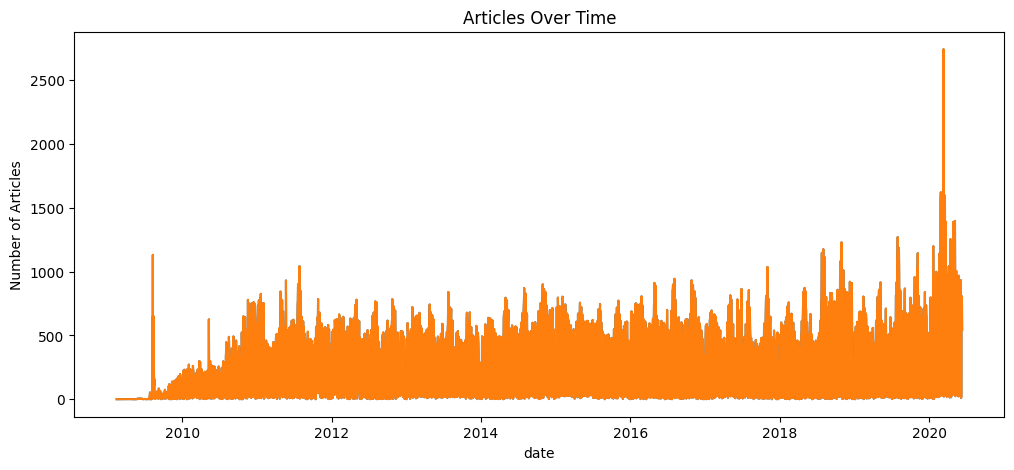

In [8]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
articles_per_day = df.groupby(df['date'].dt.date).size()

articles_per_day.plot(figsize=(12, 5), title="Articles Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Date")
articles_per_day = df.groupby(df['date'].dt.date).size()
articles_per_day.plot(figsize=(12, 5), title="Articles Over Time")
plt.show()

In [ ]:
df.head()

,date,headline,url,publisher,stock,headline_length,headline_blob
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,7,"(S, t, o, c, k, s, , T, h, a, t, , H, i, t, ..."
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,7,"(S, t, o, c, k, s, , T, h, a, t, , H, i, t, ..."
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,5,"(7, 1, , B, i, g, g, e, s, t, , M, o, v, e, ..."
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,7,"(4, 6, , S, t, o, c, k, s, , M, o, v, i, n, ..."
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,14,"(B, , o, f, , A, , S, e, c, u, r, i, t, i, ..."


In [9]:
# Add sentiment, POS tags, and word counts to DataFrame
nltk_tagger = NLTKTagger()
df["headline_blob"] = df["headline"].apply(lambda x: TextBlob(str(x), pos_tagger=nltk_tagger))
df["sentiment"] = df["headline_blob"].apply(lambda x: x.sentiment)
df["polarity"] = df["sentiment"].apply(lambda x: x.polarity)  
df["subjectivity"] = df["sentiment"].apply(lambda x: x.subjectivity)  
df["word_count"] = df["headline"].apply(lambda x: len(str(x).split()))

KeyboardInterrupt: 